In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/ms4610project"

/content/drive/MyDrive/ms4610project


In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv("Training Data_2021.csv")
test_df = pd.read_csv("Test Data_2021.csv")
#df['default_ind'].value_counts() 0-59145 and 1-23855
#df['mvar47'].value_counts()    C-52043 and L-30957
#df['mvar47'].nunique()


In [ ]:
df.head(3)

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.0,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.0,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.0,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  object 
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            83000 non-null  object 
 7   mvar7            83000 non-null  object 
 8   mvar8            83000 non-null  object 
 9   mvar9            83000 non-null  object 
 10  mvar10           83000 non-null  object 
 11  mvar11           83000 non-null  object 
 12  mvar12           83000 non-null  object 
 13  mvar13           83000 non-null  object 
 14  mvar14           83000 non-null  int64  
 15  mvar15           83000 non-null  object 
 16  mvar16           83000 non-null  object 
 17  mvar17      

## Get all missing values as np.NaN


In [ ]:
df = df.replace('missing', np.NaN)
df = df.replace('na', np.NaN)
test_df = test_df.replace('missing', np.NaN).replace('na', np.NaN)

In [ ]:
def get_int(x):
  if x is np.NaN:
    return x 
  else :
    return int(x)

def get_float(x):
  if x is np.NaN:
    return x 
  else :
    return float(x)

In [ ]:
df_new  = df.copy()
df_new.columns

Index(['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar47',
       'default_ind'],
      dtype='object')

In [ ]:
test_df_new = test_df.copy()

In [ ]:
# get the float values for columns that can be float 
float_columns= ['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6','mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13','mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27','mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34','mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46'
]
for column in float_columns:
  df_new[column]= df_new[column].apply(get_float)
  test_df_new[column] = test_df_new[column].apply(get_float)

In [ ]:
df.head(3)

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.0,0.0,0.0,0,6015,322,40369,18414,NaN,6423,3067,123875,NaN,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,NaN,0,C,0
1,230033,1846,0.8095,0.0,0.0,0.0,102,7532,3171,18234,13664,NaN,765,1931,42613,NaN,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,NaN,2251,169,0.4167,0,0,8,0,2,0,99.129,NaN,0,13,0.63836,NaN,NaN,L,1
2,230034,1745,0.4001,0.0,0.0,0.0,NaN,2536,NaN,NaN,2536,NaN,NaN,NaN,76109,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669,4623,3772,NaN,NaN,25.0833,0,NaN,1,NaN,1,0,NaN,29.29,0,1,1.00000,NaN,0,C,1


In [ ]:
colums =[ 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6','mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13','mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27','mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34','mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46','mvar47']

In [ ]:

feature_unique_values = []
for feature in colums:
  temp = df_new[df_new[feature] != np.NaN].copy()
  num_uniqe_values = temp[feature].unique().__len__()
  feature_unique_values.append({
      "feature":feature, "num_unique_values" : num_uniqe_values
  })

In [ ]:
feature_unique_values_df = pd.DataFrame(feature_unique_values)
feature_unique_values_df.head(3)

,feature,num_unique_values
0,mvar1,455
1,mvar2,24657
2,mvar3,18950


In [ ]:
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.1f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", rotation=60) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

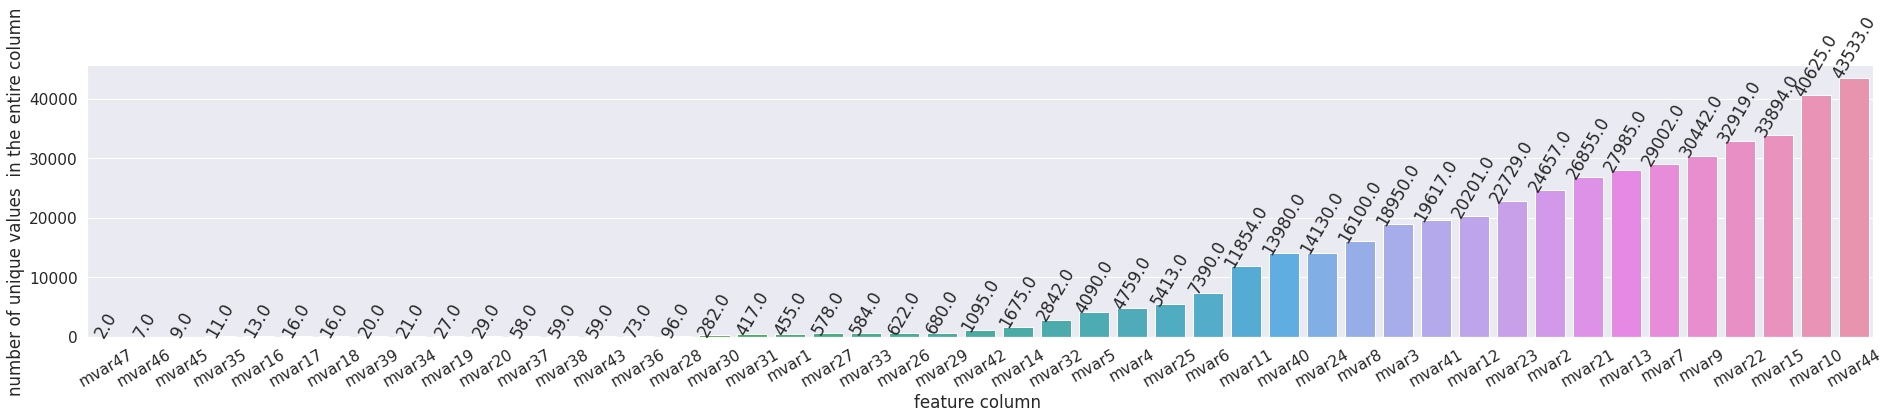

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(32,5))
ax =sns.barplot(data = feature_unique_values_df.sort_values(by='num_unique_values'),
                x ='feature', y ='num_unique_values'
            )
ax.set_xticklabels(feature_unique_values_df.sort_values(by='num_unique_values')['feature'],rotation=30)
plt.xlabel("feature column ")
plt.ylabel("number of unique values  in the entire column")
show_values_on_bars(ax)

In [ ]:
from tqdm.notebook import  tqdm

In [ ]:
feature_num_null_values = []
for feature in tqdm(colums):
  num_null_values = df[feature].isna().sum()
  feature_num_null_values.append({
      "feature":feature, "num_null_values" : num_null_values
  })
feature_num_null_values_df = pd.DataFrame(feature_num_null_values)
feature_num_null_values_df['num_null_values_percent'] = feature_num_null_values_df.num_null_values/830
feature_num_null_values_df.head(3)

  0%|          | 0/47 [00:00<?, ?it/s]

,feature,num_null_values,num_null_values_percent
0,mvar1,3733,4.497590
1,mvar2,5886,7.091566
2,mvar3,535,0.644578


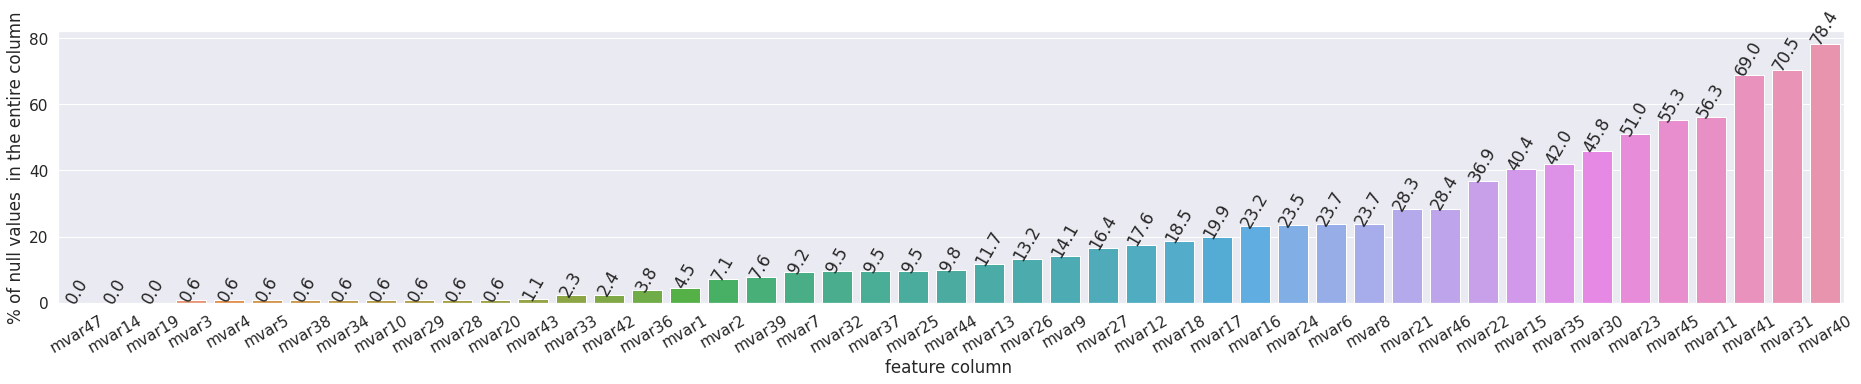

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(32,5))
ax =sns.barplot(data = feature_num_null_values_df.sort_values(by='num_null_values'),
                x ='feature', y ='num_null_values_percent'
            )
ax.set_xticklabels(feature_num_null_values_df.sort_values(by='num_null_values')['feature'],rotation=30)
plt.xlabel("feature column ")
plt.ylabel("% of null values  in the entire column")
show_values_on_bars(ax)

In [ ]:
feature_num_null_values_df[feature_num_null_values_df['feature']=='mvar31']

,feature,num_null_values,num_null_values_percent
30,mvar31,58539,70.528916


In [ ]:
feature_num_null_values_df.sort_values(by='num_null_values')[37:]['feature'].to_list()

['mvar22',
 'mvar15',
 'mvar35',
 'mvar30',
 'mvar23',
 'mvar45',
 'mvar11',
 'mvar41',
 'mvar31',
 'mvar40']

In [ ]:
!pip install missingno

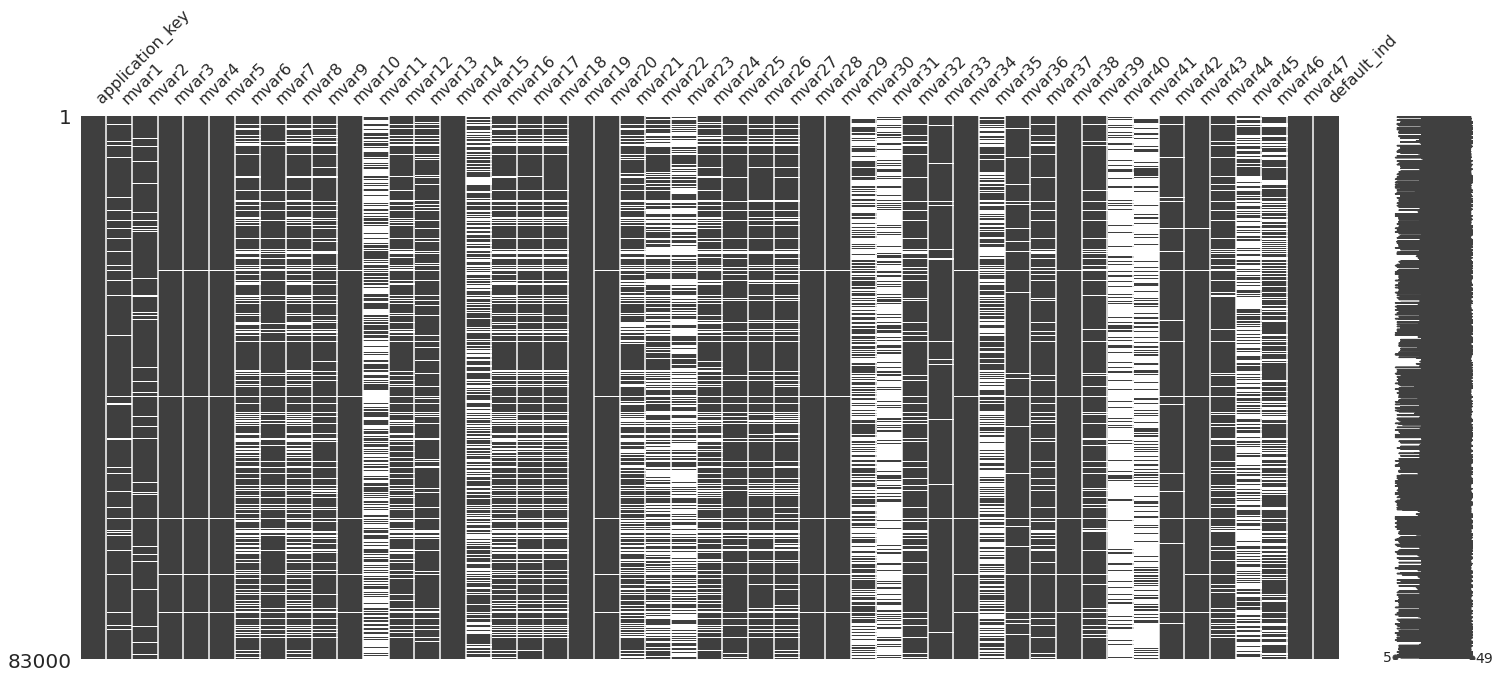

In [ ]:
import missingno as msno
msno.matrix(df_new)


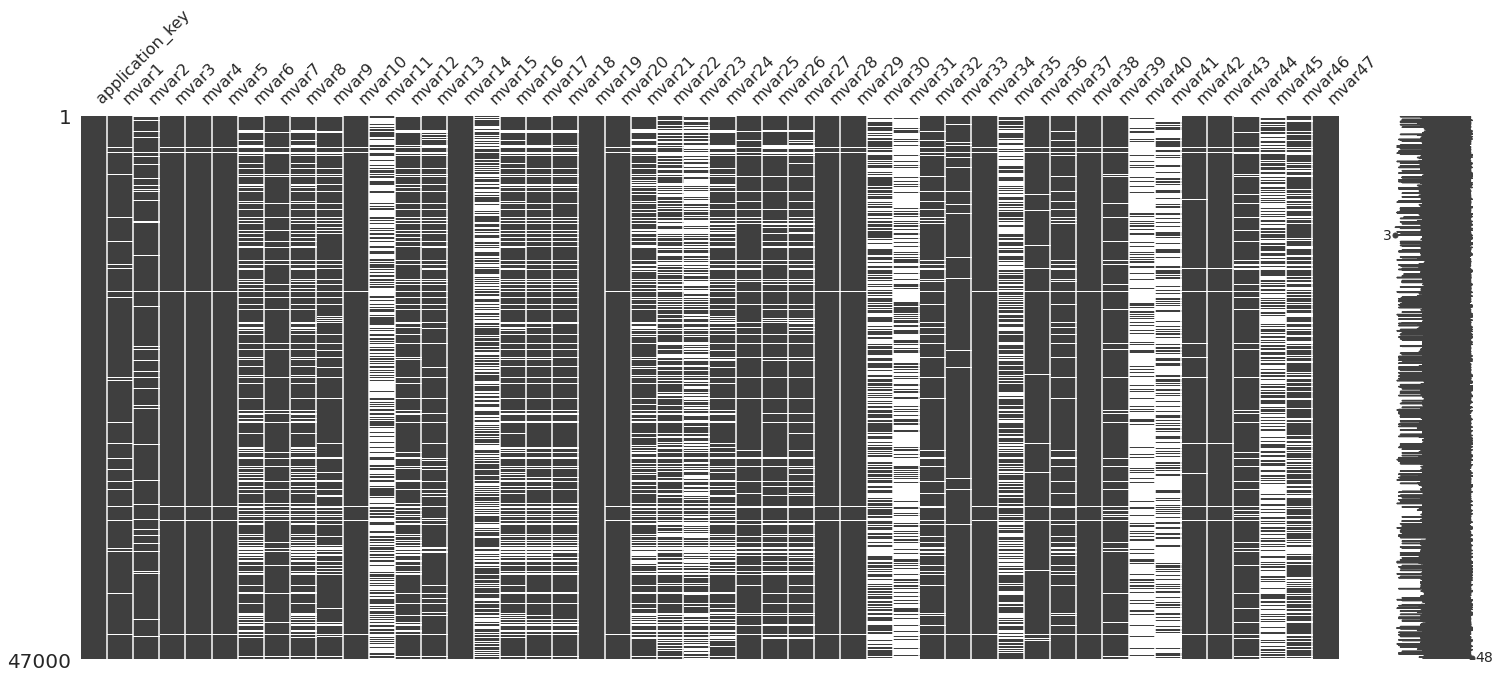

In [ ]:
import missingno as msno
msno.matrix(test_df_new)

# Summary Of each columns before imputation

In [ ]:
temp =  df.copy().replace("missing", np.NaN).replace("na", np.NaN)
for x in temp.columns:
  print(f"=================================\n {x}")
  print(temp[x].describe())

 application_key
count     83000.000000
mean     318146.931060
std       97179.489955
min      230032.000000
25%      250781.750000
50%      271531.500000
75%      362296.250000
max      578068.000000
Name: application_key, dtype: float64
 mvar1
count     79267
unique      454
top        1736
freq        491
Name: mvar1, dtype: object
 mvar2
count    77114.000000
mean         1.054816
std          1.556682
min          0.000000
25%          0.131800
50%          0.513000
75%          1.386200
max         31.018100
Name: mvar2, dtype: float64
 mvar3
count    82465.000000
mean         5.401784
std         11.091569
min          0.000000
25%          0.000000
50%          0.300000
75%          6.595000
max        399.334000
Name: mvar3, dtype: float64
 mvar4
count    82465.000000
mean         0.461151
std          1.704292
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.754000
Name: mvar4, dtype: float64
 mvar5
count    82465.000000
m

# Getting categorical columns

In [ ]:
remove_features = ['mvar22','mvar26',
 'mvar15',
 'mvar35',
 'mvar30',
 'mvar23',
 'mvar45',
 'mvar11',
 'mvar41',
 'mvar31',
 'mvar40']

In [ ]:
feature_unique_values_df_filtered =feature_unique_values_df[feature_unique_values_df['feature'].apply(lambda x : x not in remove_features)]

In [ ]:
dist_hist_threshold =  100
categorical_features = feature_unique_values_df_filtered[feature_unique_values_df_filtered['num_unique_values']<dist_hist_threshold].sort_values(by='num_unique_values')['feature'].to_list()
quantitative_features =  feature_unique_values_df_filtered[feature_unique_values_df_filtered['num_unique_values'] > dist_hist_threshold].sort_values(by='num_unique_values')['feature'].to_list()
print(f"number of categorical feature {len(categorical_features)}  number of quatitative features {len(quantitative_features)}")

number of categorical feature 14  number of quatitative features 22


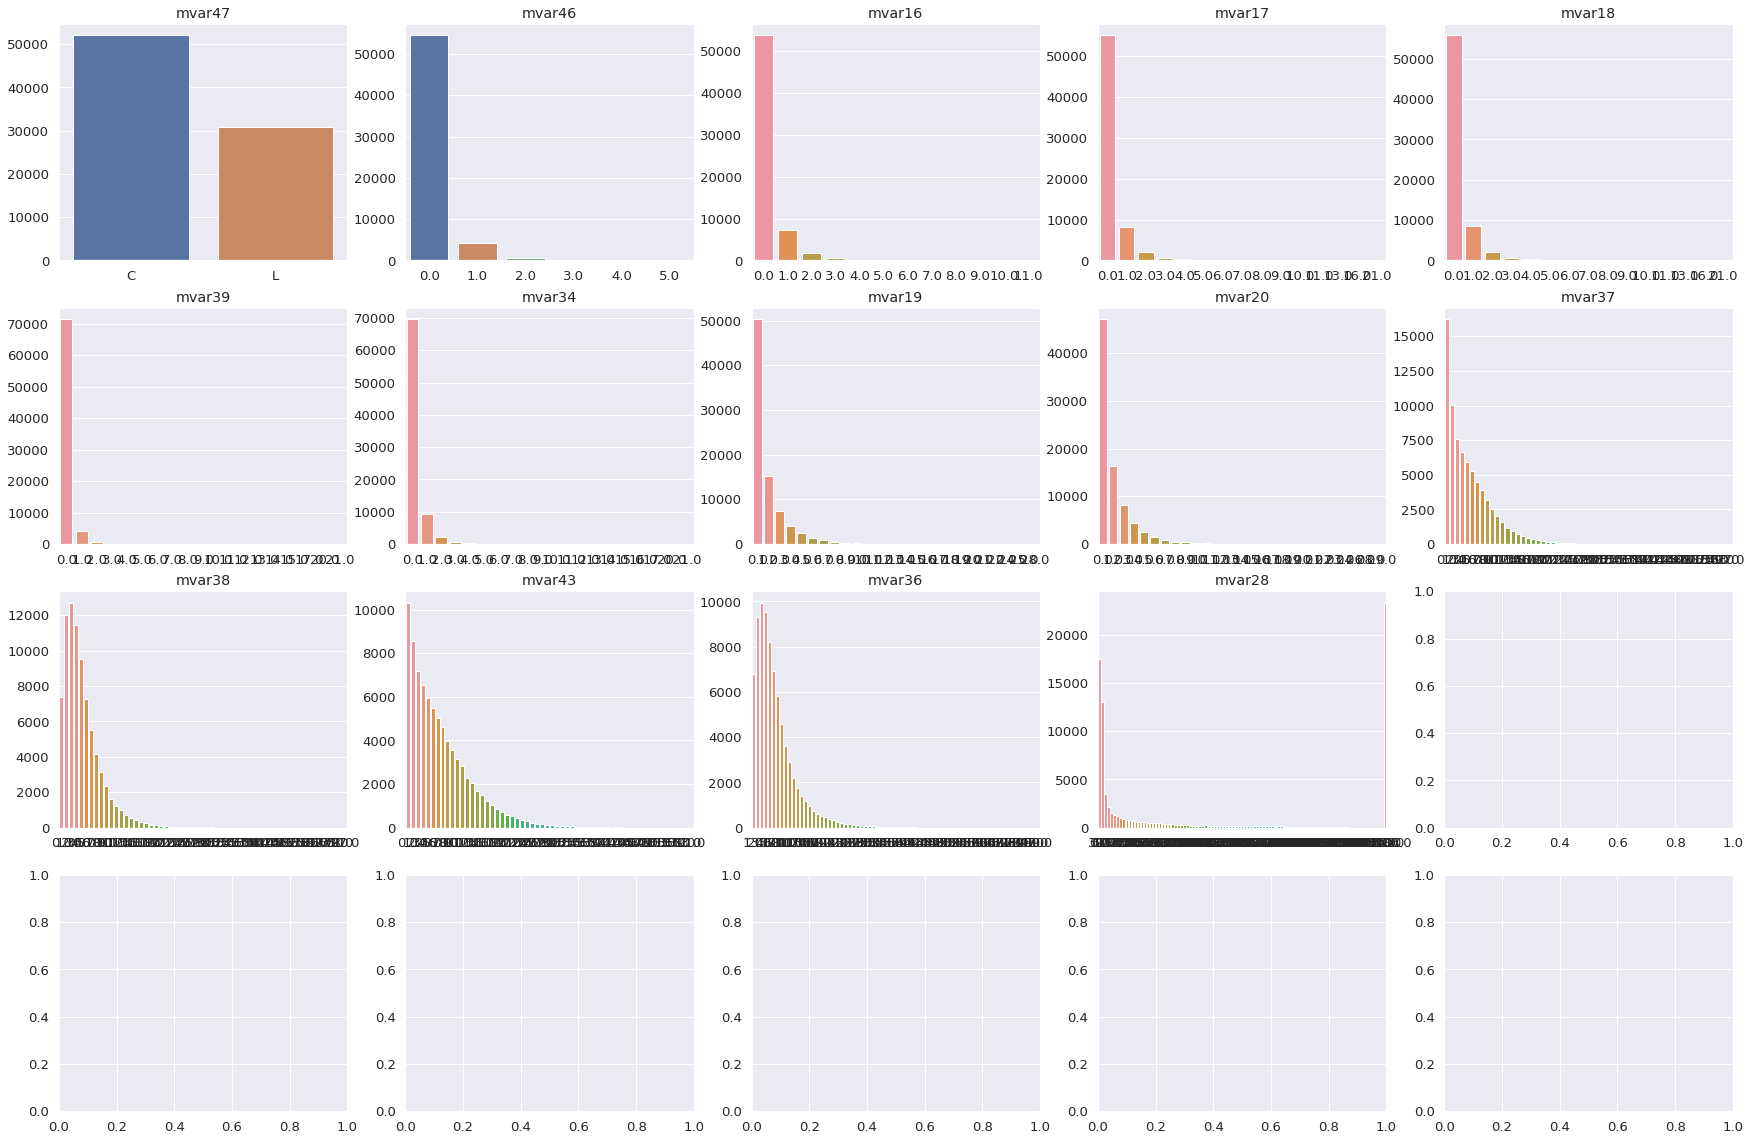

In [ ]:
rows = 4
cols = 5
sns.set(font_scale=1.2)
fig,ax =  plt.subplots(rows,cols,figsize=(30, 20))
for i in range(rows):
  for j in range(cols):
    if i*cols+j<len(categorical_features):
      feature = categorical_features[i*cols+j]
      temp = df_new[df_new[feature] != np.NaN].copy()
      x = temp[feature].value_counts().index
      y = temp[feature].value_counts().values
      sns.barplot(ax= ax[i,j] ,x = x, y= y)
      ax[i,j].set_title(f"{feature}") 
plt.show()

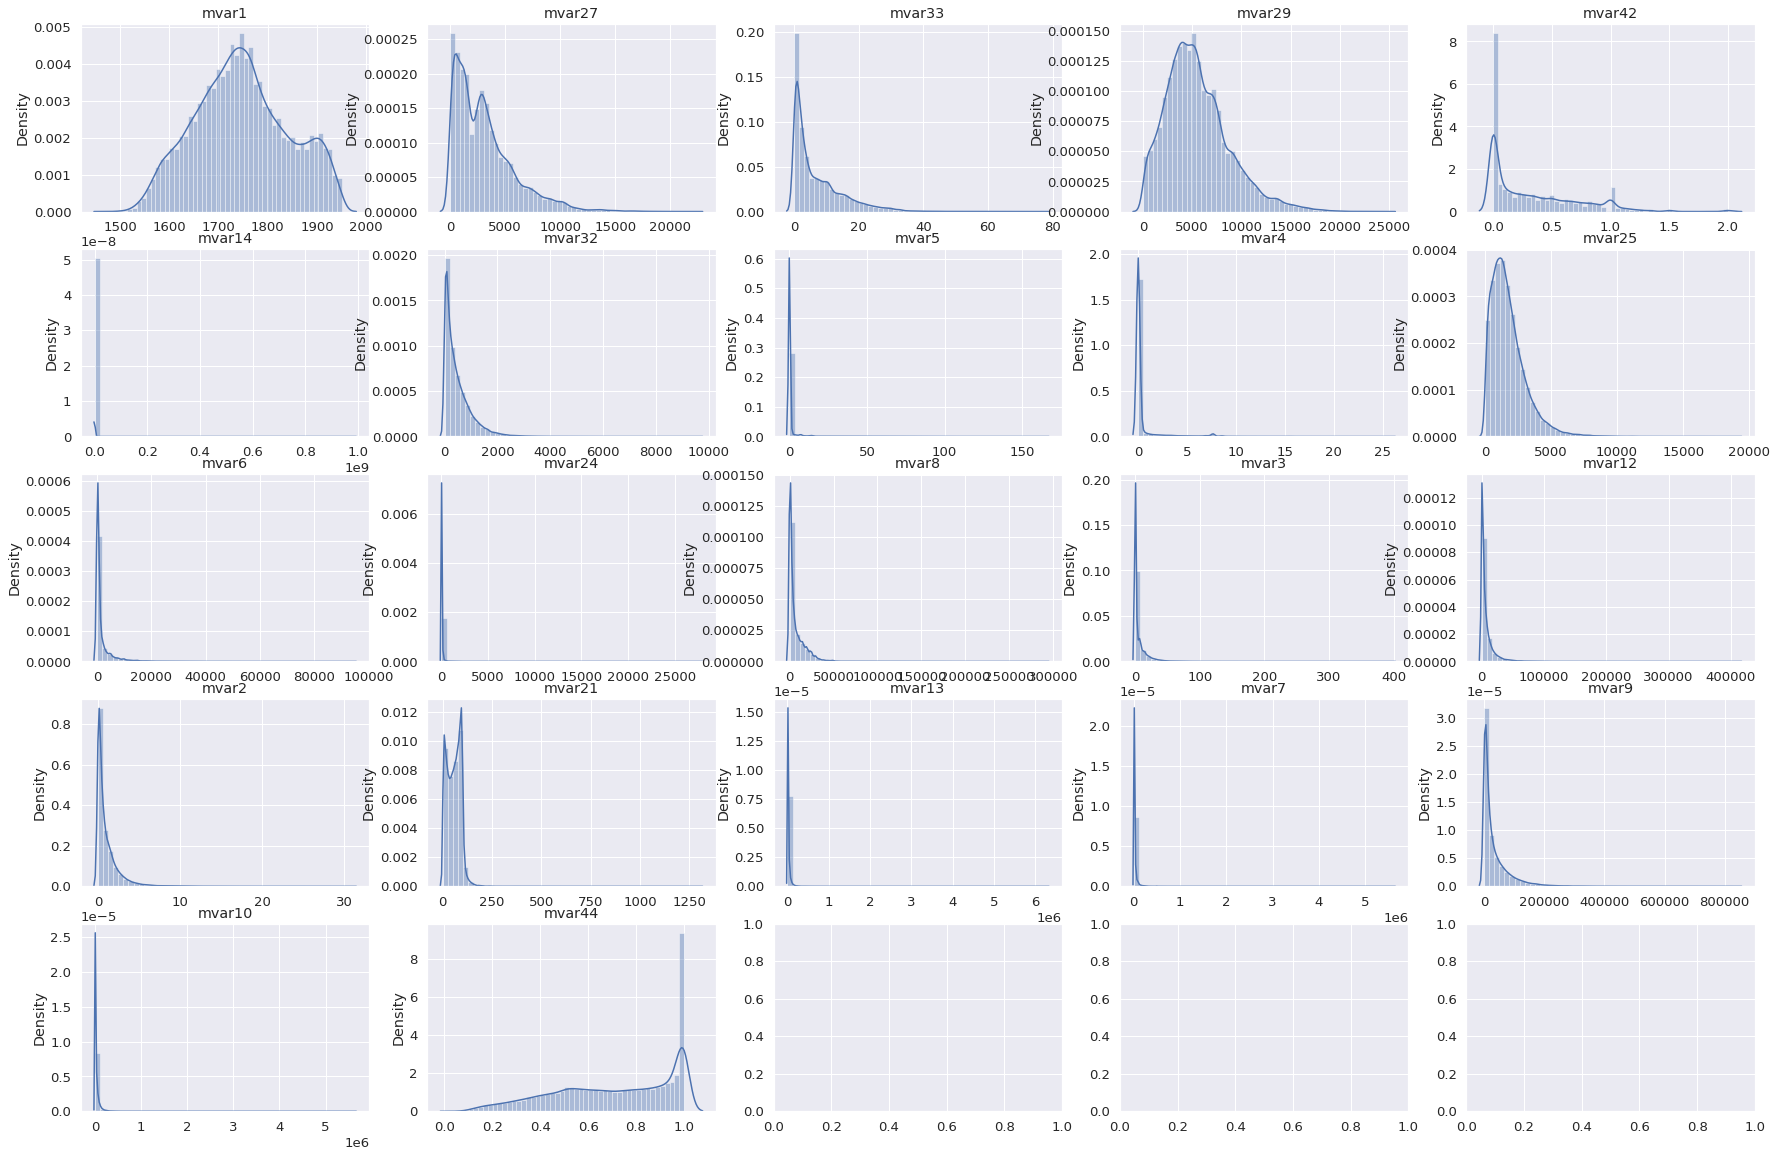

In [ ]:
rows = 5
cols = 5
sns.set(font_scale=1.2)
fig,ax =  plt.subplots(rows,cols,figsize=(30, 20))
for i in range(rows):
  for j in range(cols):
    if i*cols+j<len(quantitative_features):
      feature = quantitative_features[i*cols+j]
      temp = df_new[df_new[feature]!= np.NaN].copy()
      sns.distplot(ax= ax[i,j] ,x = temp[feature])
      ax[i,j].set_title(f"{feature}") 
plt.show()

# Transformation after imputing with Mean 

In [ ]:
test_df_imputed = test_df_new.copy()

In [ ]:
# imputation with mean and median 
df_imputed = df_new.copy()
for feature in quantitative_features:
  df_imputed[feature].fillna(value =df_imputed[feature].mean(), inplace=True)
  test_df_imputed[feature].fillna(value =df_imputed[feature].mean(), inplace=True)



In [ ]:
print(df_imputed['mvar46'].unique())
df_imputed['mvar46'].value_counts()

[ 0. nan  1.  2.  3.  4.  5.]


0.0    54493
1.0     4339
2.0      506
3.0       54
4.0        3
5.0        2
Name: mvar46, dtype: int64

In [ ]:
df_imputed['mvar46'] = df_imputed['mvar46'].fillna(df_imputed.mvar46.mode()[0])

In [ ]:
for feature in categorical_features:
  df_imputed[feature] = df_imputed[feature].fillna(value =df_imputed[feature].mode()[0])
  test_df_imputed[feature] = test_df_imputed[feature].fillna(value =df_imputed[feature].mode()[0])

## Plots After Imputation with mean and mode streategy 

In [ ]:
feature_num_null_values_df.head()

,feature,num_null_values,num_null_values_percent
0,mvar1,3733,4.497590
1,mvar2,5886,7.091566
2,mvar3,535,0.644578
3,mvar4,535,0.644578
4,mvar5,535,0.644578


In [ ]:
quantitative_features_sorted= feature_num_null_values_df[feature_num_null_values_df.sort_values(by='num_null_values').feature.apply(lambda x : x in quantitative_features)].sort_values(by='num_null_values')['feature'].to_list()

In [ ]:
# feature_num_null_values_df[feature_num_null_values_df.sort_values(by='num_null_values').feature.apply(lambda x : x in quantitative_features)].sort_values(by='num_null_values')

In [ ]:
from sklearn.preprocessing import  StandardScaler

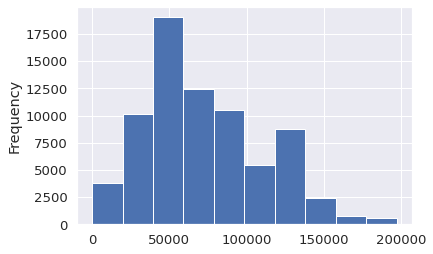

In [ ]:
df_new[df_new['mvar14']<df_new['mvar14'].quantile(0.90)]['mvar14'].plot(kind='hist')

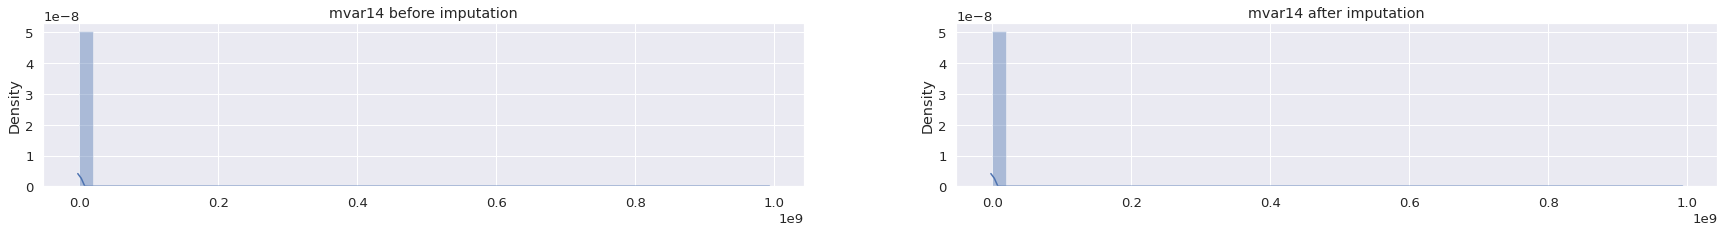

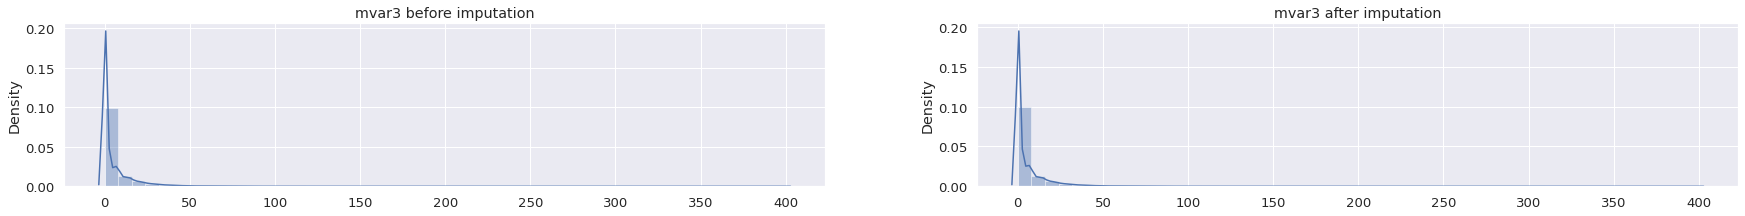

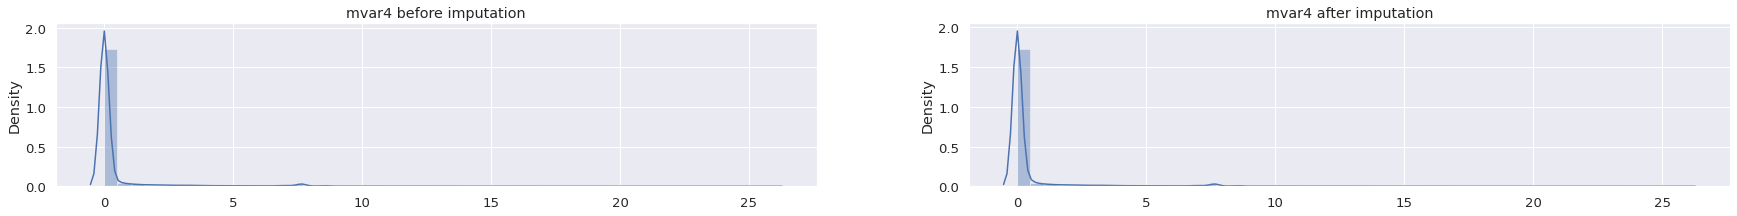

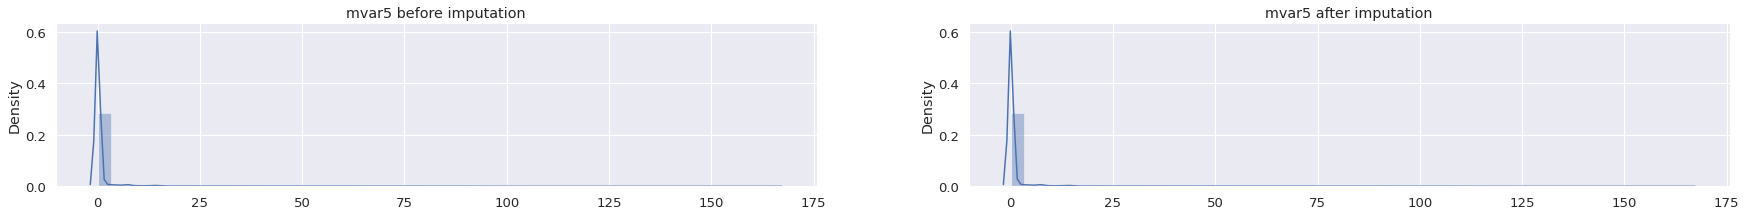

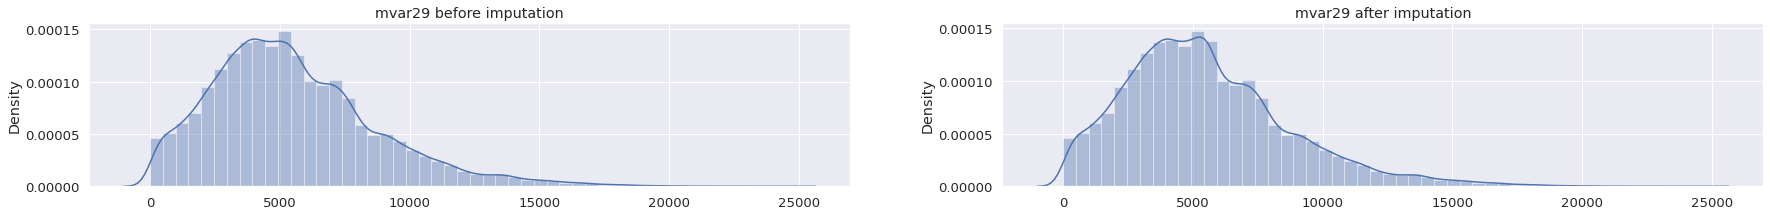

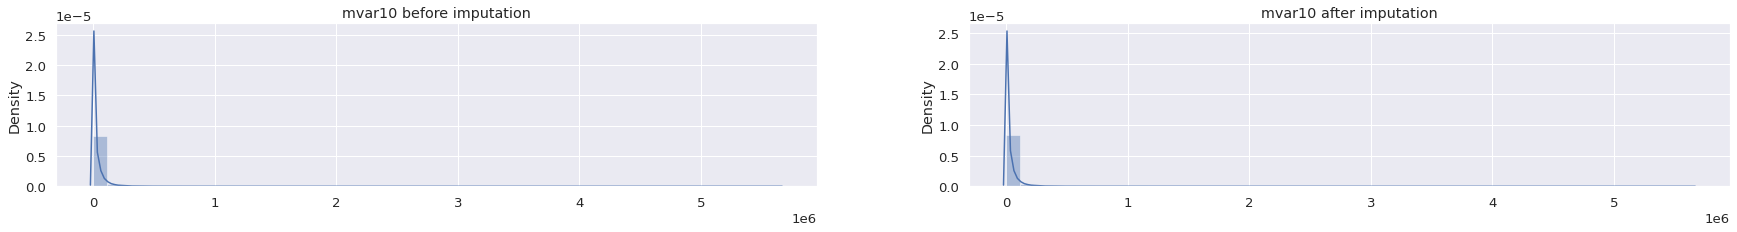

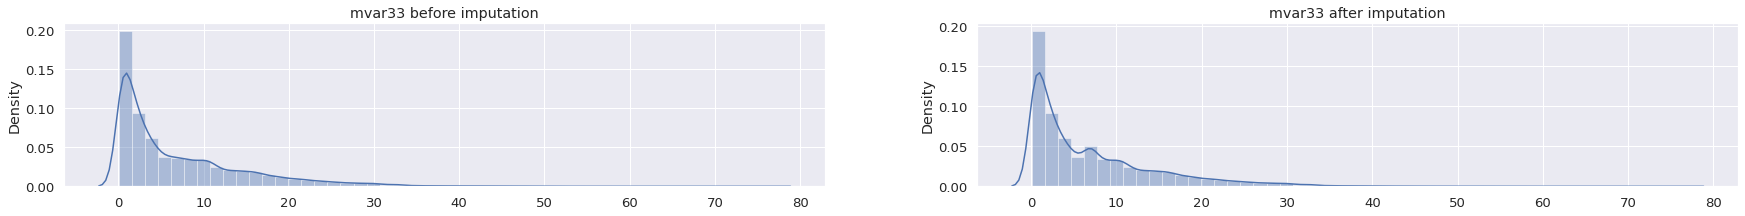

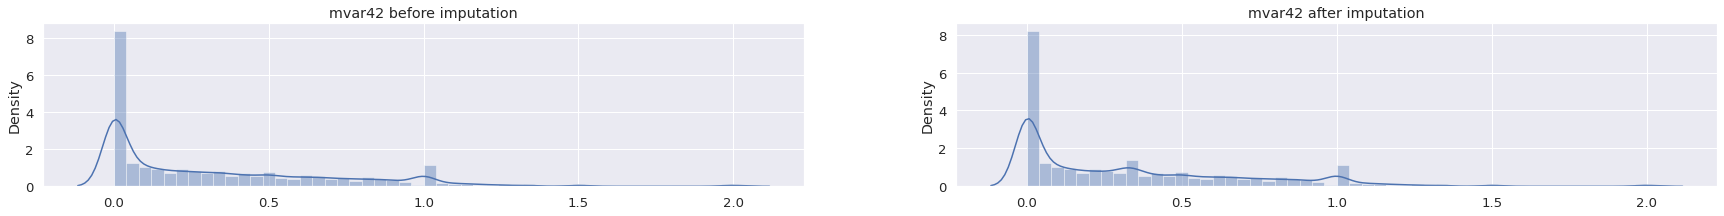

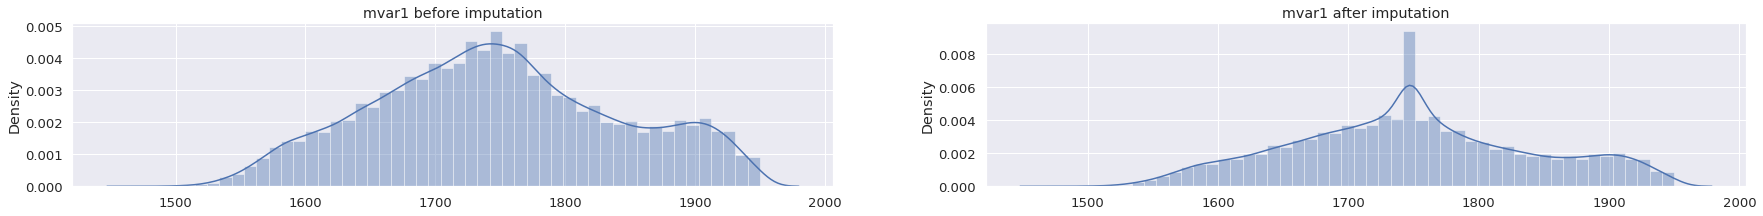

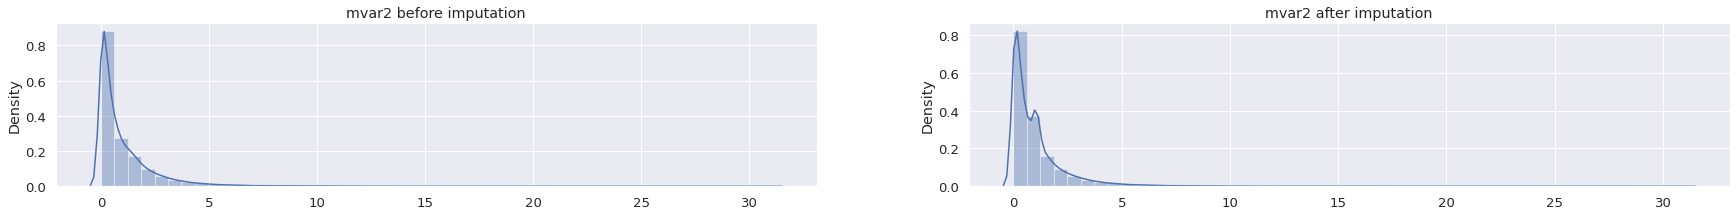

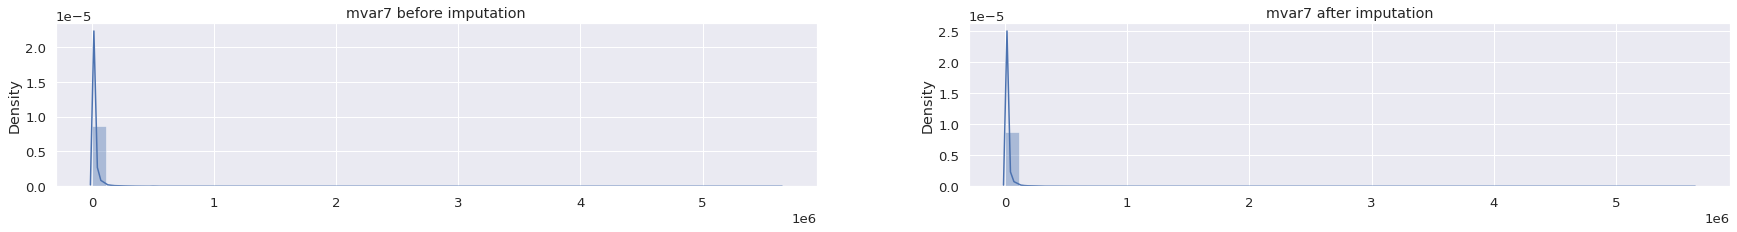

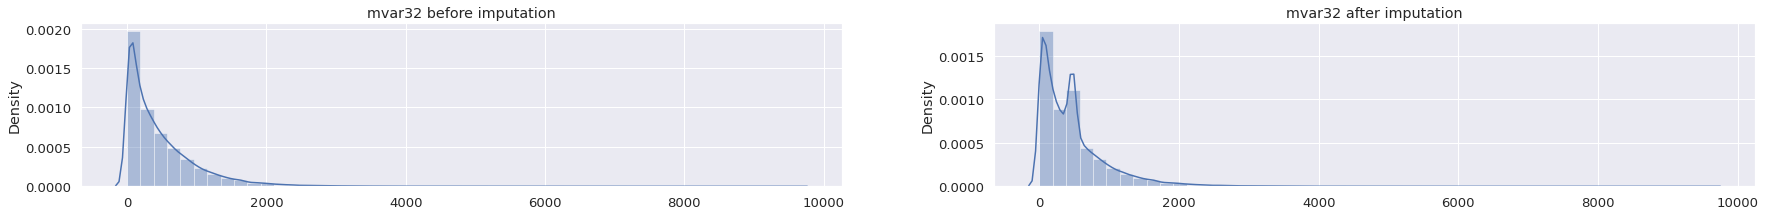

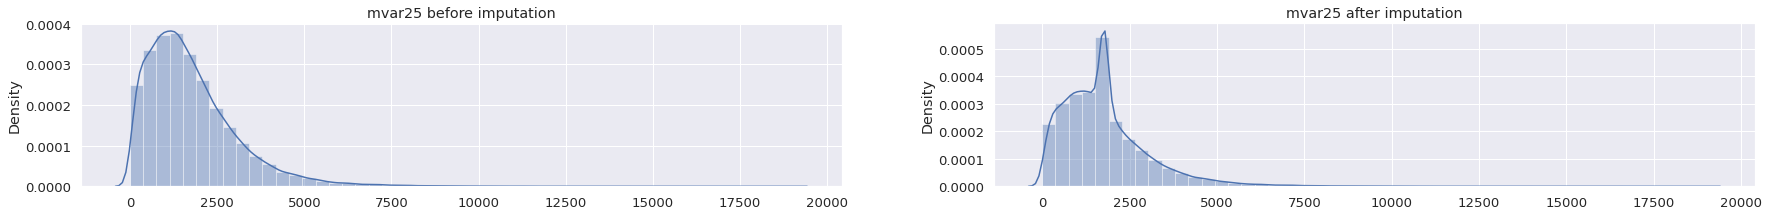

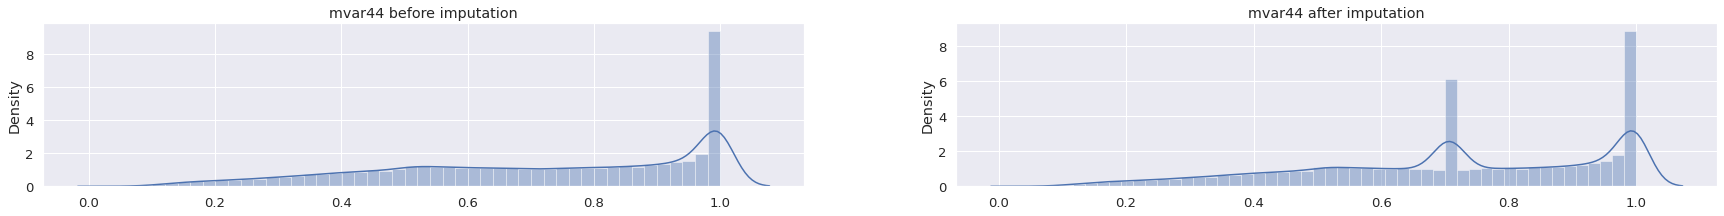

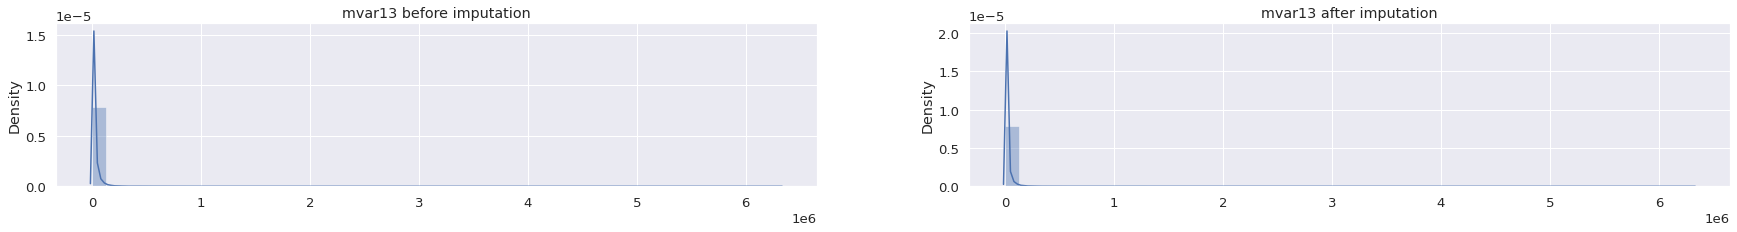

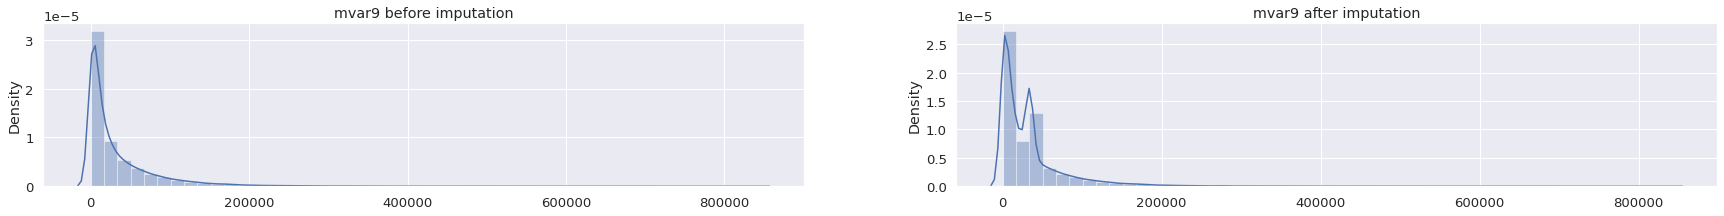

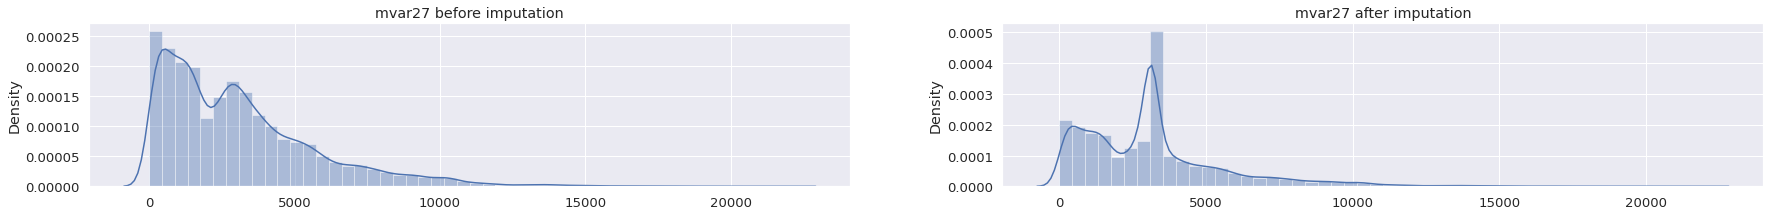

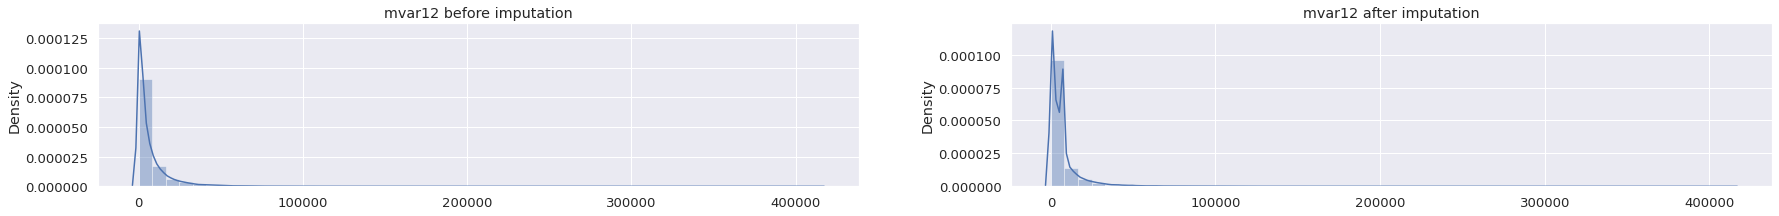

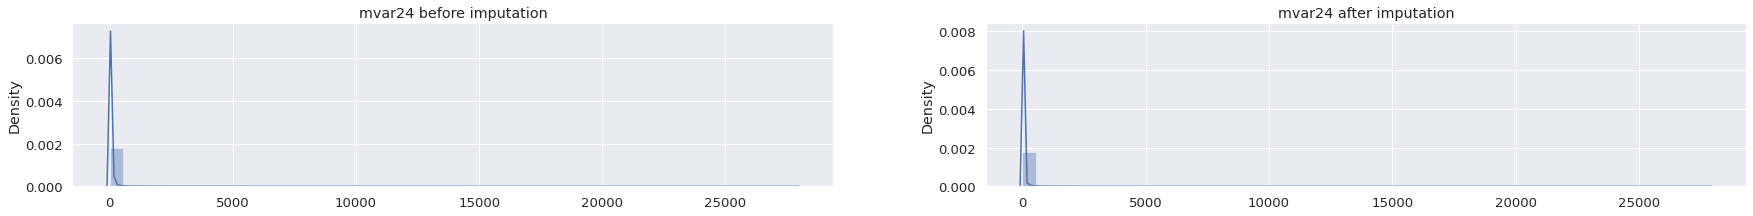

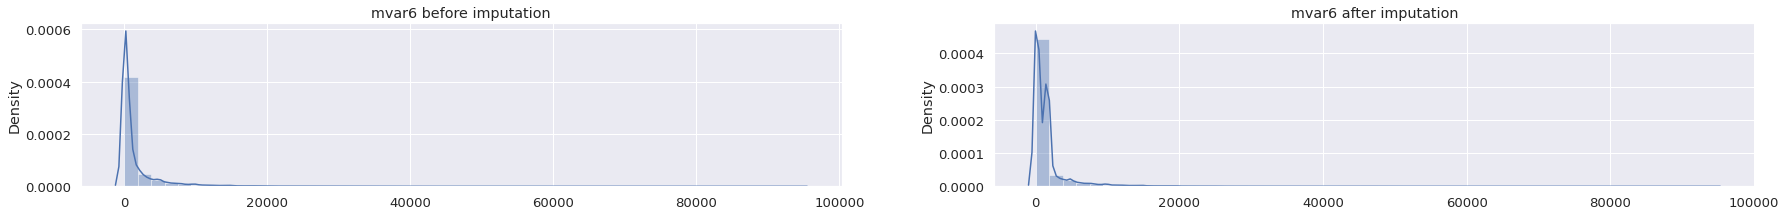

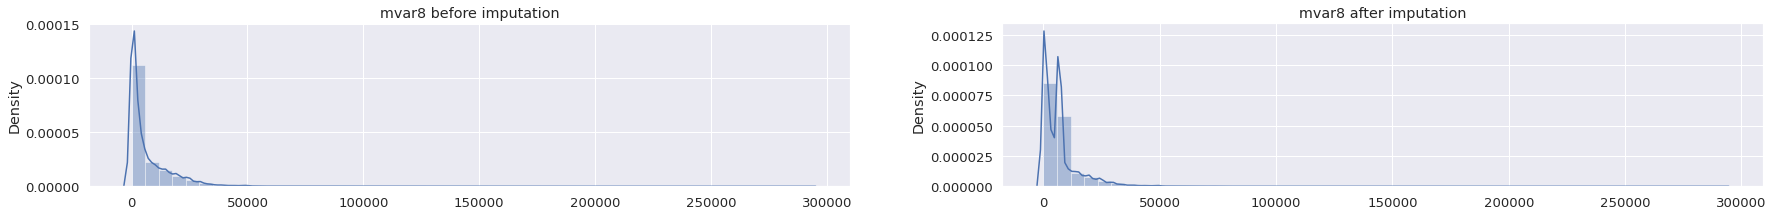

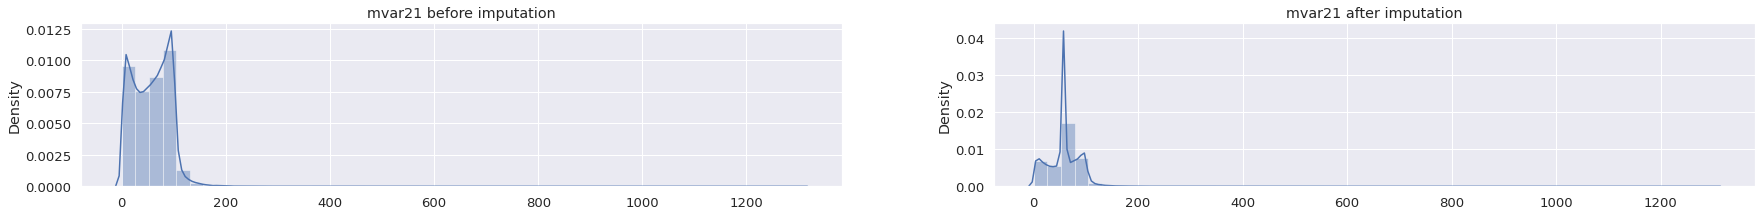

In [ ]:
sns.set(font_scale=1.2)
for feature in quantitative_features_sorted:
  fig,ax =  plt.subplots(1,2,figsize=(30, 3))
  temp = df_new[df_new[feature] != np.NaN].copy()
  sns.distplot(ax= ax[0] ,x = temp[feature])
  ax[0].set_title(f"{feature} before imputation") 
  sns.distplot(ax= ax[1] ,x = df_imputed[feature])
  ax[1].set_title(f"{feature} after imputation") 
  plt.show()

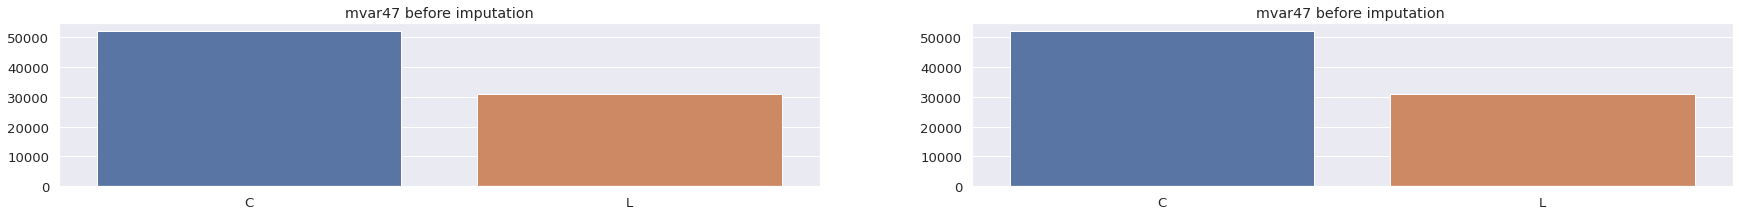

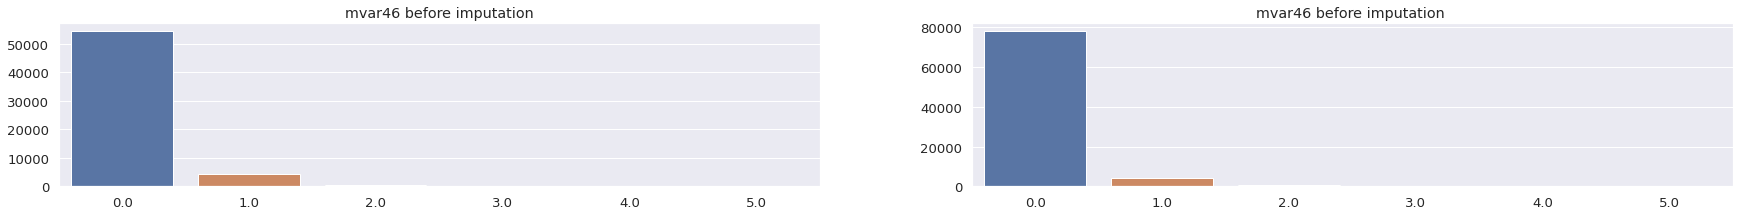

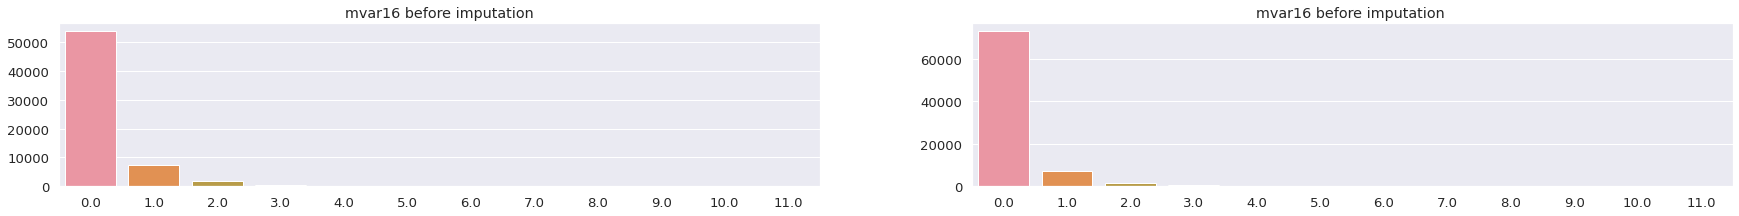

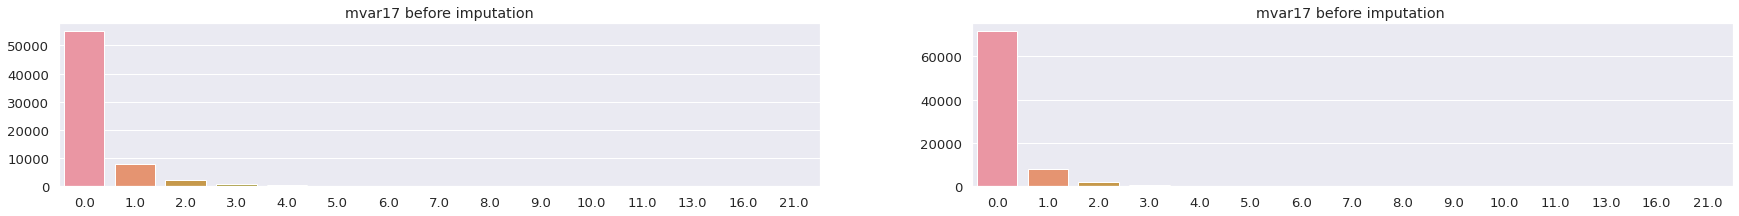

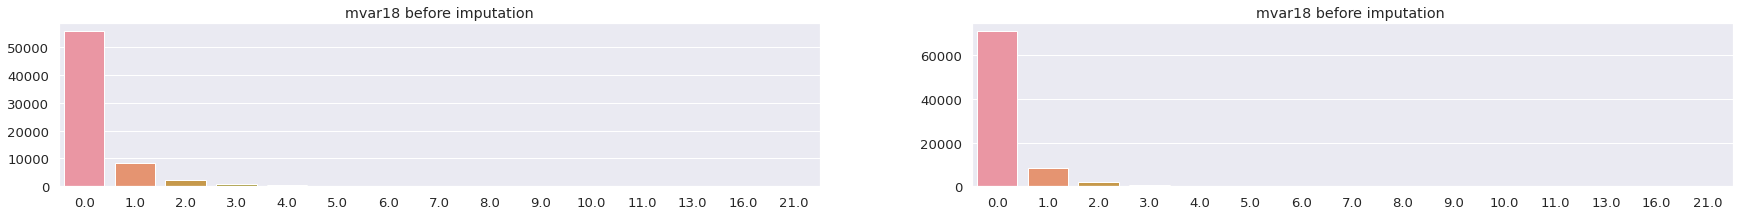

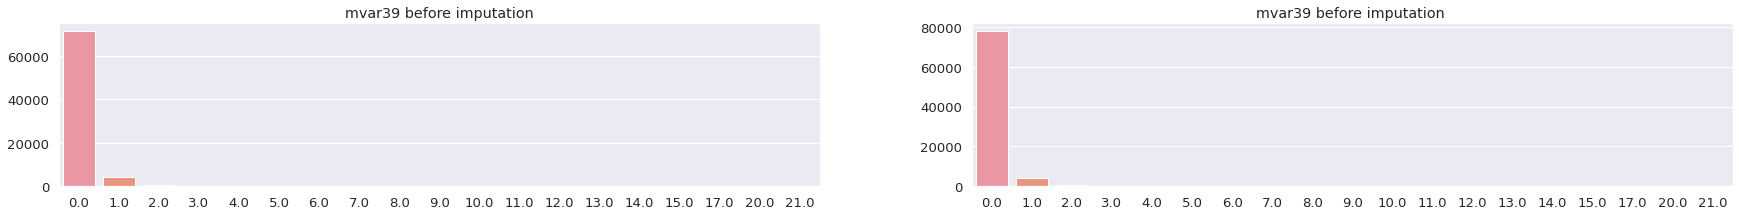

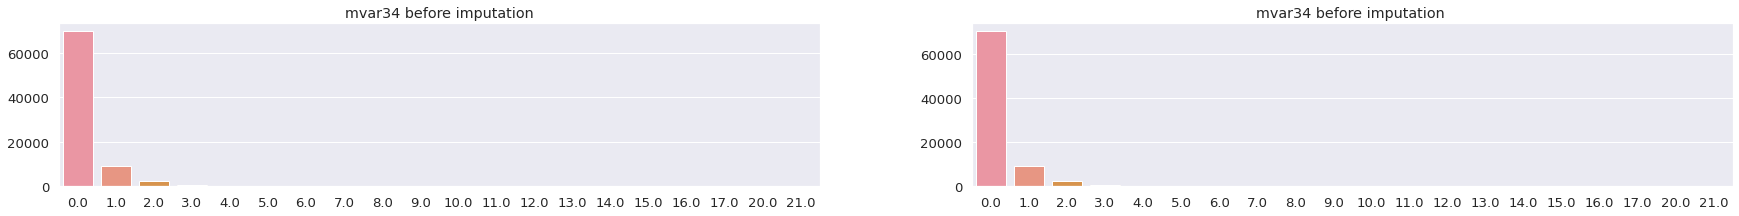

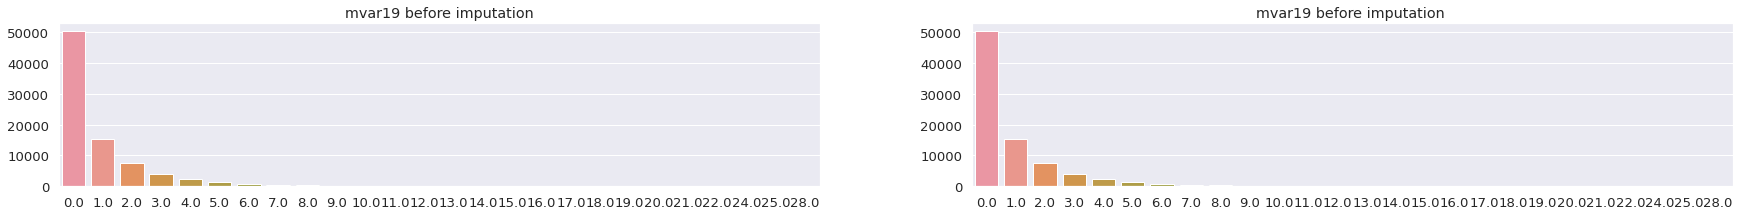

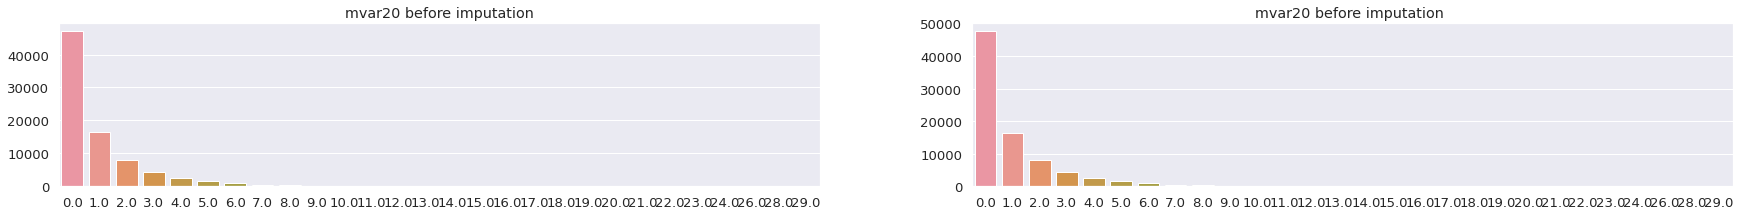

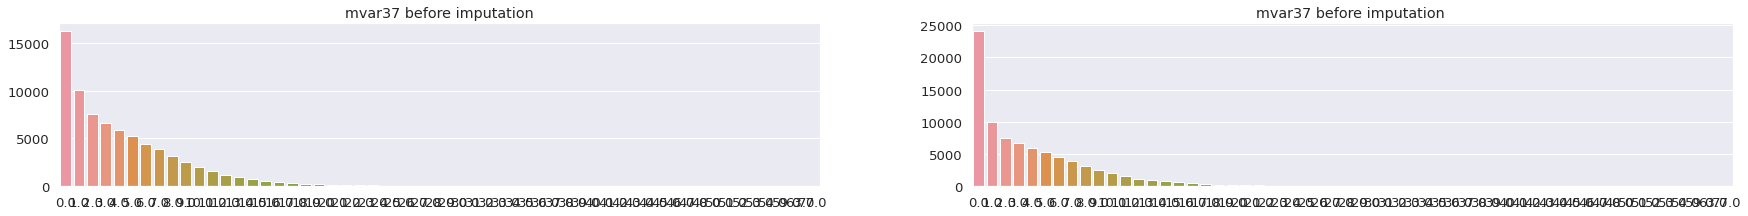

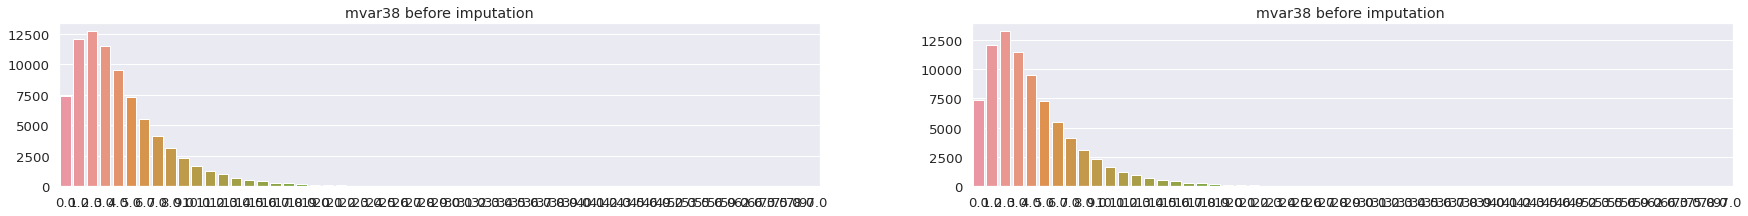

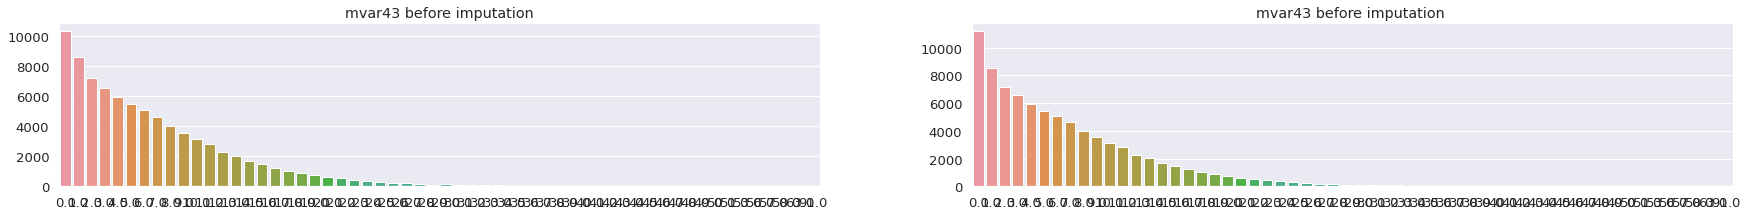

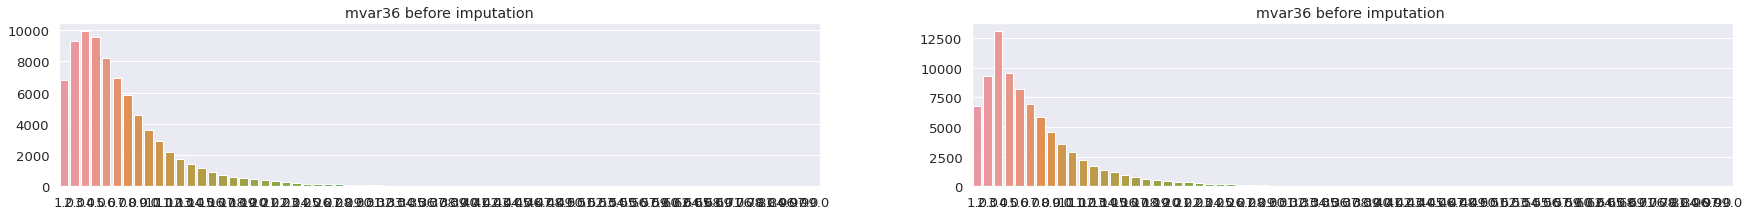

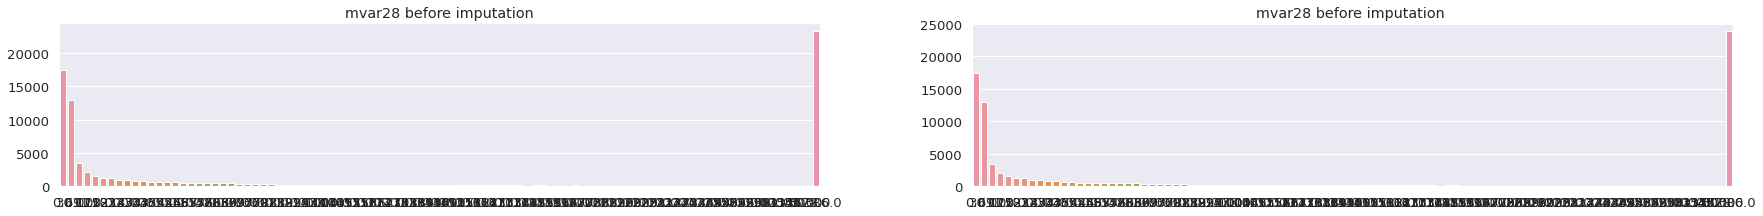

In [ ]:
sns.set(font_scale=1.2)
for feature in categorical_features:
  fig,ax =  plt.subplots(1,2,figsize=(30, 3))
  temp = df_new[df_new[feature] != np.NaN].copy()
  value_counts = temp[feature].value_counts()
  sns.barplot(ax= ax[0] ,x =value_counts.index, y= value_counts.values)
  ax[0].set_title(f"{feature} before imputation") 
  value_counts = df_imputed[feature].value_counts()
  sns.barplot(ax= ax[1],x =value_counts.index, y= value_counts.values)
  ax[1].set_title(f"{feature} before imputation ") 
  plt.show()

# Target Value Distribution 

In [ ]:
import  plotly.express as px 

# sns.histplot(df_new['default_ind'].value_counts(),bins=2)

In [ ]:
df_new['default_ind'].value_counts()

0    59145
1    23855
Name: default_ind, dtype: int64

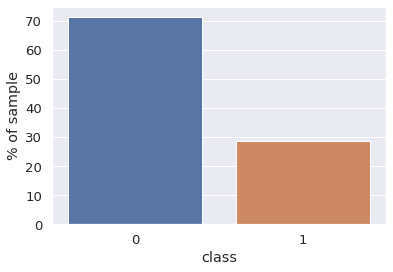

In [ ]:
fig = sns.barplot(x=['0', '1'], y=[59145/830,23855/830])
plt.xlabel("class")
plt.ylabel("% of sample")
plt.title("class distribution")
plt.show()

In [ ]:
df_imputed['mvar47_encoded'] = df_imputed['mvar47'].apply(lambda x :1 if x=='C' else 0)

In [ ]:
input_features = [ 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46' , 'mvar47_encoded'
       ]

target_features = ['default_ind']

In [ ]:
from sklearn.model_selection import train_test_split
x , y = df_imputed[input_features].drop(columns=remove_features), df_imputed[target_features]
x_train, x_val, y_train, y_val         = train_test_split(x,y,test_size=0.25)

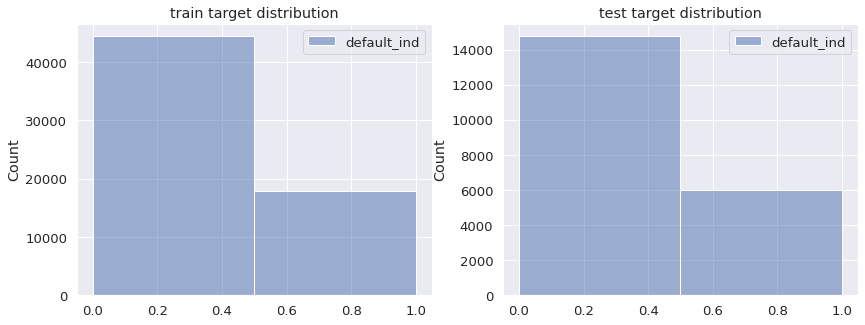

In [ ]:
fig , ax = plt.subplots(1,2,figsize = (14,5))
sns.histplot(y_train, ax=ax[0],bins=2)
ax[0].set_title("train target distribution")
sns.histplot(y_val, ax=ax[1],bins=2)
ax[1].set_title("test target distribution")
plt.show()

# Test to Classification models

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
classifiers = {
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(3),
   # "SVC":SVC(kernel="rbf", C=0.025, probability=True),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "GaussianNB":GaussianNB()
    }

In [ ]:
def evaluate_model(model):
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_val = model.predict(x_val)
  print(f"training accuracy {accuracy_score(y_train,y_pred_train)} test accuracy {accuracy_score(y_val, y_pred_val)}")

  y_pred_train = model.predict_proba(x_train)
  y_pred_val = model.predict_proba(x_val)
  print(f"training log loss {log_loss(y_train,y_pred_train)} test log loss {log_loss(y_val, y_pred_val)}")
  return model 

In [ ]:
for key in classifiers:
  print(f"=====================================\n {key}")
  evaluate_model(classifiers[key])


In [ ]:
for max_depth in [20]:
  print(f"=====================================\n {n_estimators}")
  random_forest_classifer = RandomForestClassifier(n_estimators=100,criterion='gini' , max_depth=max_depth )
  evaluate_model(random_forest_classifer)

In [ ]:
lda = LinearDiscriminantAnalysis()
evaluate_model(lda)

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

In [ ]:
evaluate_model(xgb_classifier)

In [ ]:
 x_test =test_df_imputed[input_features]
y_test  = random_forest_classifer.predict(x_test)

In [ ]:
test_df_imputed['default_ind'] = y_test

In [ ]:
test_df[['application_key','default_ind']].to_csv("group29_1.csv", index=False)

# Variable Relevances 

In [ ]:
!pip install shap

In [ ]:
import shap 

In [ ]:
explainer = 

# Imputation with Knn

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df_imputed_knn = df_new.copy()

In [ ]:
imputer = KNNImputer()

In [ ]:
df_imputed_knn.columns

In [ ]:
features = ['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46']

In [ ]:
imputer.fit_transform(df_imputed_knn[features])

# Explaining variables 